In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#데이터 프레임 한글 표시될 수 있도록 설정 - 윈도우, 맥, 리눅스에 맞게 설정됨
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: #linux
    plt.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
plt.rcParams['axes.unicode_minus'] = False

In [13]:
crime =pd.read_csv('police_2.csv', encoding='cp949', index_col=["죄종별"])

In [14]:
crime

,항목,2018,2019,2020,2021,2022
죄종별,,,,,,
사기,발생건수[건],270029,304472,347675,294075,325848
전자금융거래법위반,발생건수[건],7877,8132,6402,7024,9731
횡령,발생건수[건],55113,58508,58889,50421,60220
도박범죄,발생건수[건],6004,8008,8135,6391,4463


In [19]:
#죄종별에서 도박범죄만 남기고 나머지 삭제
#항목 열 삭제

df_crime = crime.drop(columns="항목", index=["도박범죄", "전자금융거래법위반", "횡령"])
df_crime

,2018,2019,2020,2021,2022
죄종별,,,,,
사기,270029,304472,347675,294075,325848


In [22]:
#죄종별 삭제
fruad_crime = df_crime.rename_axis(index={"죄종별":""})

In [23]:
fruad_crime

,2018,2019,2020,2021,2022
,,,,,
사기,270029,304472,347675,294075,325848


In [24]:
fruad_crime.columns.name='연도'
fruad_crime=fruad_crime.transpose()
fruad_crime

,사기
연도,
2018,270029
2019,304472
2020,347675
2021,294075
2022,325848


In [25]:
fruad_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2018 to 2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사기      5 non-null      int64
dtypes: int64(1)
memory usage: 252.0+ bytes


In [6]:
cpi=pd.read_csv("df_cpi.csv",index_col=["연도"])
cpi

,소비자물가 총지수(2020=100),소비자물가상승률(%)
연도,,
2018,99.1,1.5
2019,99.5,0.4
2020,100.0,0.5
2021,102.5,2.5
2022,107.7,5.1


In [26]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2018 to 2022
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   소비자물가 총지수(2020=100)  5 non-null      float64
 1   소비자물가상승률(%)          5 non-null      float64
dtypes: float64(2)
memory usage: 292.0 bytes


In [28]:
print(fruad_crime.index)
print(cpi.index)

Index(['2018', '2019', '2020', '2021', '2022'], dtype='object', name='연도')
Int64Index([2018, 2019, 2020, 2021, 2022], dtype='int64', name='연도')


In [29]:
fruad_crime.index=fruad_crime.index.astype(int)

In [32]:
cpi_fruad=pd.concat([fruad_crime,cpi],axis=1)
cpi_fruad

,사기,소비자물가 총지수(2020=100),소비자물가상승률(%)
연도,,,
2018,270029,99.1,1.5
2019,304472,99.5,0.4
2020,347675,100.0,0.5
2021,294075,102.5,2.5
2022,325848,107.7,5.1


In [33]:
cpi_fruad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2018 to 2022
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   사기                   5 non-null      int64  
 1   소비자물가 총지수(2020=100)  5 non-null      float64
 2   소비자물가상승률(%)          5 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 160.0 bytes


In [35]:
cpi_fruad.isnull().sum()

사기                     0
소비자물가 총지수(2020=100)    0
소비자물가상승률(%)            0
dtype: int64

In [34]:
cpi_fruad.describe()

,사기,소비자물가 총지수(2020=100),소비자물가상승률(%)
count,5.000000,5.000000,5.000000
mean,308419.800000,101.760000,2.000000
std,29748.633661,3.574633,1.931321
min,270029.000000,99.100000,0.400000
25%,294075.000000,99.500000,0.500000
50%,304472.000000,100.000000,1.500000
75%,325848.000000,102.500000,2.500000
max,347675.000000,107.700000,5.100000


In [36]:
cpi_fruad.corr(method='pearson')

,사기,소비자물가 총지수(2020=100),소비자물가상승률(%)
사기,1.000000,0.317050,0.058673
소비자물가 총지수(2020=100),0.317050,1.000000,0.954914
소비자물가상승률(%),0.058673,0.954914,1.000000


<Axes: xlabel='소비자물가 총지수(2020=100)', ylabel='사기'>

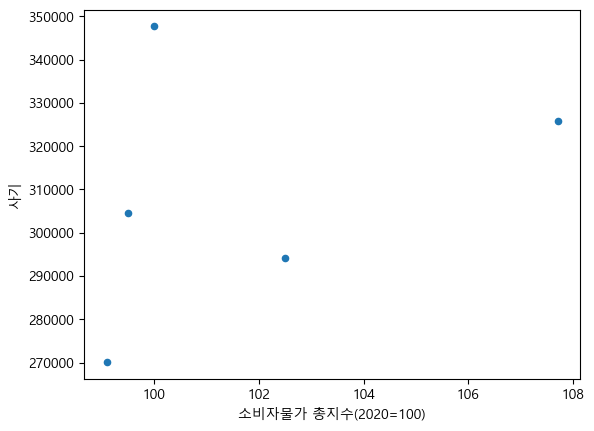

In [37]:
cpi_fruad.plot(kind='scatter', x='소비자물가 총지수(2020=100)', y='사기')